In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
from itertools import groupby
import datetime as dt

#visualizing results
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#import yellowbrick as yb

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

In [10]:
#read in task df

path_task = 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/probability_discounting/task.csv'
    
task = pd.read_csv(path_task, index_col=0)
task = pd.DataFrame(data = task)

print(task.shape)

task.head(10)

(2507, 17)


,date,animal_number,session,sub_session,trial_num,high_reward_lever,reinforcement_count,right_lever_count,right_lever_latency,left_lever_count,left_lever_latency,HE_trial_count,HE_trial_latency_1st,HE_wait,rt_reward,lt_reward,prob_lever
503,190729,683,100,choice,0,1,1,0,0.00,1,0.81,1,0.13,NaN,2.0,1.0,0.0
504,190729,683,100,choice,1,1,2,1,1.36,0,0.00,1,0.09,1.0,2.0,1.0,0.0
505,190729,683,100,choice,2,1,1,0,0.00,1,3.27,3,1.39,0.0,2.0,1.0,0.0
506,190729,683,100,choice,3,1,1,0,0.00,1,0.80,1,0.21,8.0,2.0,1.0,0.0
507,190729,683,100,choice,4,1,2,1,1.62,0,0.00,2,0.05,11.0,2.0,1.0,0.0
508,190729,683,100,choice,5,1,2,1,1.13,0,0.00,0,0.00,1.0,2.0,1.0,0.0
509,190729,683,100,choice,6,1,2,1,1.48,0,0.00,0,0.00,14.0,2.0,1.0,0.0
510,190729,683,100,choice,7,1,2,1,1.85,0,0.00,0,0.00,28.0,2.0,1.0,0.0
511,190729,683,100,choice,8,1,2,1,1.12,0,0.00,1,0.21,5.0,2.0,1.0,0.0
512,190729,683,100,choice,9,1,2,1,0.93,0,0.00,0,0.00,3.0,2.0,1.0,0.0


In [11]:
path_animal_info = 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Analysis/Excel files/Med boxes/PD_round1.xlsx'

animal_info = pd.read_excel(path_animal_info)
animal_info = pd.DataFrame(data = animal_info)

animal_info.rename(columns={"animal": "animal_number"}, inplace=True)
print(animal_info.shape)

animal_info.head()

(19, 4)


,animal_number,high_reward,cage,group
0,684,2,2,1
1,685,2,2,1
2,686,2,2,1
3,693,1,5,1
4,694,1,5,1


In [12]:
df_final = (task.merge(animal_info,
                on=['animal_number'], how='left'))
df_final.head()

,date,animal_number,session,sub_session,trial_num,high_reward_lever,reinforcement_count,right_lever_count,right_lever_latency,left_lever_count,left_lever_latency,HE_trial_count,HE_trial_latency_1st,HE_wait,rt_reward,lt_reward,prob_lever,high_reward,cage,group
0,190729,683,100,choice,0,1,1,0,0.00,1,0.81,1,0.13,NaN,2.0,1.0,0.0,1,1,2
1,190729,683,100,choice,1,1,2,1,1.36,0,0.00,1,0.09,1.0,2.0,1.0,0.0,1,1,2
2,190729,683,100,choice,2,1,1,0,0.00,1,3.27,3,1.39,0.0,2.0,1.0,0.0,1,1,2
3,190729,683,100,choice,3,1,1,0,0.00,1,0.80,1,0.21,8.0,2.0,1.0,0.0,1,1,2
4,190729,683,100,choice,4,1,2,1,1.62,0,0.00,2,0.05,11.0,2.0,1.0,0.0,1,1,2


In [13]:
df_final.groupby(['session', 'group']).mean()

date  animal_number  trial_num  high_reward_lever  reinforcement_count  right_lever_count  right_lever_latency  left_lever_count  left_lever_latency  HE_trial_count  HE_trial_latency_1st   HE_wait  rt_reward  lt_reward  prob_lever  high_reward      cage
session group                                                                                                                                                                                                                                                                        
0       1      190802.509025     688.462094  11.129964           1.657040             0.505415           0.472924             0.817437          0.516245            0.859134        0.422383              0.100578  4.193676        NaN        NaN         NaN     1.657040  3.166065
        2      190802.570796     692.292035  10.836283           1.601770             0.491150           0.384956             0.787389          0.615044            0.970885        0.557522              0.156770  6.019417        NaN        NaN         NaN     1.601770  4.438053
25      1      190801.172161     688.395604  10.967033           1.666667             0.780220           0.468864             1.010440          0.531136            0.931319        0.483516              0.178022  4.791165   1.333333   1.666667    1.666667     1.666667  3.139194
        2      190801.175439     692.245614  10.951754           1.596491             0.793860           0.403509             0.962763          0.583333            0.967281        0.574561              0.148114  6.043269   1.403509   1.596491    1.596491     1.596491  4.429825
50      1      190743.022901     688.446565  10.564885           1.656489             1.034351           0.477099             1.144924          0.522901            0.923550        0.419847              0.203244  6.537815   1.343511   1.656489    1.656489     1.656489  3.160305
        2      190745.181034     692.150862  11.120690           1.603448             0.965517           0.366379             0.872112          0.603448            0.995948        0.806034              0.303922  5.264151   1.396552   1.603448    1.603448     1.603448  4.383621
75      1      190730.171642     688.555970  10.742537           1.649254             1.287313           0.444030             1.267724          0.537313            1.085410        0.858209              0.336455  6.418033   1.350746   1.649254    1.649254     1.649254  3.197761
        2      190730.207792     692.376623  11.099567           1.614719             1.242424           0.424242             1.064459          0.554113            1.105628        0.831169              0.346926  5.473934   1.385281   1.614719    1.614719     1.614719  4.463203
100     1      190727.154676     688.438849  11.143885           1.669065             1.467626           0.345324             1.278921          0.543165            1.418273        1.374101              0.538345 -0.696850   1.330935   1.669065    0.000000     1.669065  3.147482
        2      190729.206897     692.288793  11.120690           1.607759             1.590517           0.431034             1.728491          0.556034            2.163922        2.056034              0.628190  8.113208   1.392241   1.607759    0.000000     1.607759  4.431034

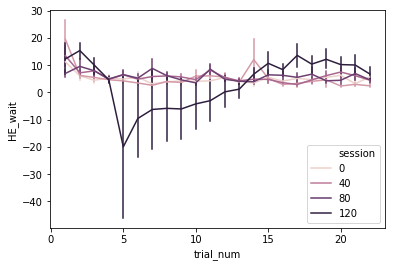

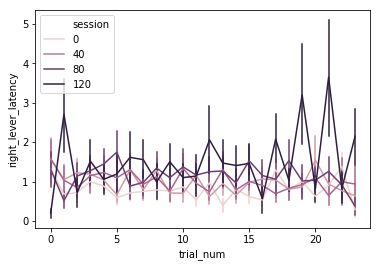

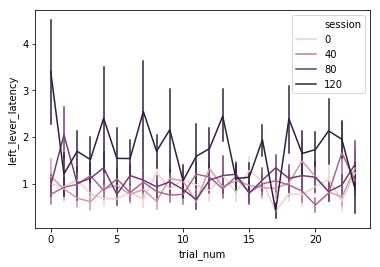

In [14]:
sns.lineplot(x='trial_num', y='HE_wait', data=task, hue='session', err_style="bars", ci=68)
plt.show()
sns.lineplot(x='trial_num', y='right_lever_latency', data=task, hue='session', err_style="bars", ci=68)
plt.show()
sns.lineplot(x='trial_num', y='left_lever_latency', data=task, hue='session', err_style="bars", ci=68)

In [15]:
df_final.groupby(['animal_number', 'session'])['date'].value_counts()

animal_number  session  date  
683            0        190802    45
               25       190801    46
               50       190731    46
               75       190730    43
               100      190729    44
684            0        190802    48
               25       190801    48
               50       190731    44
               75       190730    45
               100      190726    48
685            0        190802    48
               25       190801    48
               50       190731    48
               75       190730    46
               100      190726    47
686            0        190802    48
               25       190801    48
               50       190731    46
               75       190730    44
               100      190726    48
689            0        190802    38
               25       190801    38
               50       190731    34
               75       190730    39
               100      190729    43
690            0        190802    45
       

In [16]:
#make new df with high reward vs low reward columns by session

pd_df_session = pd.DataFrame()

animals = df_final['animal_number'].unique()

for animal in animals:
    
    #get animal data
    animal_data = df_final[df_final['animal_number'] == animal]
    
    #generate session df
    sessions = animal_data['session'].unique()
    
    for session in sessions:
        #get session data for animal
        animal_data_session = animal_data[animal_data['session'] == session]
        
        #generate session df
        sub_sessions = animal_data_session['sub_session'].unique()
    
        for sub in sub_sessions:
            #get sub_session data for animal
            animal_data_sub_session = animal_data_session[animal_data_session['sub_session'] == sub]
            
            pd_df_session_int = pd.DataFrame()
    
            #fill meta data
            pd_df_session_int['date'] = animal_data_sub_session['date'].unique()
            pd_df_session_int['cage'] = animal_data_sub_session['cage'].unique()
            pd_df_session_int['animal_number'] = animal_data_sub_session['animal_number'].unique()
            pd_df_session_int['group'] = animal_data_sub_session['group'].unique()
            pd_df_session_int['session'] = session
            pd_df_session_int['sub_session'] = sub
        
            #compute and fill session data
            if animal_data_sub_session['high_reward_lever'].unique() == 1:
                pd_df_session_int['high_reward_lever'] = 'right'
                pd_df_session_int['reinforcement_count'] = animal_data_sub_session['reinforcement_count'].sum()
                pd_df_session_int['high_reward_lever_count'] = animal_data_sub_session['right_lever_count'].sum()
                pd_df_session_int['high_reward_lever_latency_ave'] = animal_data_sub_session['right_lever_latency'].mean()
                pd_df_session_int['low_reward_lever_count'] = animal_data_sub_session['left_lever_count'].sum()
                pd_df_session_int['low_reward_lever_latency_ave'] = animal_data_sub_session['left_lever_latency'].mean()
        
            elif animal_data_sub_session['high_reward_lever'].unique() == 2:
                pd_df_session_int['high_reward_lever'] = 'left'
                pd_df_session_int['reinforcement_count'] = animal_data_sub_session['reinforcement_count'].sum()
                pd_df_session_int['high_reward_lever_count'] = animal_data_sub_session['left_lever_count'].sum()
                pd_df_session_int['high_reward_lever_latency_ave'] = animal_data_sub_session['left_lever_latency'].mean()
                pd_df_session_int['low_reward_lever_count'] = animal_data_sub_session['right_lever_count'].sum()
                pd_df_session_int['low_reward_lever_latency_ave'] = animal_data_sub_session['right_lever_latency'].mean()
            
            pd_df_session_int['high_reward_prob'] = pd_df_session_int['high_reward_lever_count'] / \
                (pd_df_session_int['high_reward_lever_count'] + pd_df_session_int['low_reward_lever_count']) * 100
            
            pd_df_session = pd_df_session.append(pd_df_session_int)
        
pd_df_session.reset_index(inplace=True, drop=True)    
pd_df_session.head()

,date,cage,animal_number,group,session,sub_session,high_reward_lever,reinforcement_count,high_reward_lever_count,high_reward_lever_latency_ave,low_reward_lever_count,low_reward_lever_latency_ave,high_reward_prob
0,190729,1,683,2,100,choice,right,35,12,0.659130,11,1.106522,52.173913
1,190729,1,683,2,100,force,right,31,10,0.784762,11,1.495714,47.619048
2,190730,1,683,2,75,choice,right,27,11,0.617917,13,1.538750,45.833333
3,190730,1,683,2,75,force,right,20,9,1.330526,10,1.586842,47.368421
4,190731,1,683,2,50,choice,right,24,2,0.096667,22,1.525417,8.333333


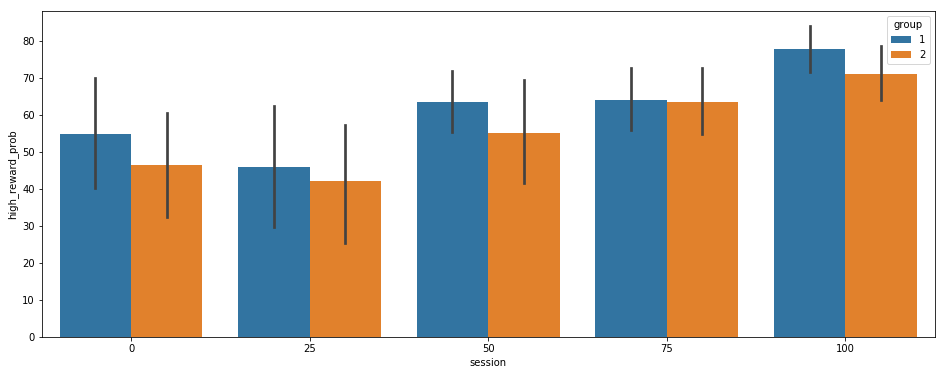

In [18]:
plt.figure(figsize=(16, 6))
g = sns.barplot(x='session', y='high_reward_prob', data=pd_df_session[pd_df_session['sub_session'] == 'choice'], ci=68, hue='group')

In [19]:
pd_df_session.to_csv('pd_df_session.csv')

In [39]:
choice_df = pd_df_session[pd_df_session['sub_session'] == 'choice']
choice_df = choice_df.drop(['date', 'cage', 'sub_session'], axis=1)
choice_df.set_index(['animal_number', 'group', 'session'], inplace=True)
choice_df.head()

high_reward_lever  reinforcement_count  high_reward_lever_count  high_reward_lever_latency_ave  low_reward_lever_count  low_reward_lever_latency_ave  high_reward_prob
animal_number group session                                                                                                                                                                       
683           2     100                 right                   35                       12                       0.659130                      11                      1.106522         52.173913
                    75                  right                   27                       11                       0.617917                      13                      1.538750         45.833333
                    50                  right                   24                        2                       0.096667                      22                      1.525417          8.333333
                    25                  right                   23                        4                       0.532609                      19                      1.081304         17.391304
                    0                   right                    3                        3                       0.203636                      19                      1.105455         13.636364

In [40]:
choice_df = choice_df.unstack(-1)
choice_df.head()

high_reward_lever                             reinforcement_count                 high_reward_lever_count                 high_reward_lever_latency_ave                                         low_reward_lever_count                 low_reward_lever_latency_ave                                         high_reward_prob                                             
session                           0      25     50     75     100                 0   25  50  75  100                     0   25  50  75  100                           0         25        50        75        100                    0   25  50  75  100                          0         25        50        75        100              0          25         50          75         100
animal_number group                                                                                                                                                                                                                                                                                                                                                                          
683           2                 right  right  right  right  right                   3  23  24  27  35                       3   4   2  11  12                      0.203636  0.532609  0.096667  0.617917  0.659130                     19  19  22  13  11                     1.105455  1.081304  1.525417  1.538750  1.106522        13.636364  17.391304   8.333333   45.833333  52.173913
684           1                  left   left   left   left   left                   7  23  25  27  46                       7   5  11  11  22                      0.368750  0.483750  1.328750  1.032273  2.540417                     17  19  13  11   2                     1.073750  2.042917  2.235000  1.722273  0.123750        29.166667  20.833333  45.833333   50.000000  91.666667
685           1                  left   left   left   left   left                  23  13  25  40  45                      23  23  23  24  22                      1.201250  1.463333  1.452917  1.502083  2.083913                      1   1   1   0   1                     0.160000  0.065417  0.064167  0.000000  0.370000        95.833333  95.833333  95.833333  100.000000  95.652174
686           1                  left   left   left   left   left                   2  24  26  31  43                       2   0   8   9  19                      0.202917  0.000000  0.630000  0.756250  2.392500                     22  24  16  15   5                     1.572500  1.835000  1.193750  1.155833  0.635417         8.333333   0.000000  33.333333   37.500000  79.166667
689           1                  left   left   left   left   left                  21  11  17  28  42                      21  17  15  17  18                      1.597619  1.287778  1.148889  1.605238  1.898750                      0   1   3   4   6                     0.000000  0.116667  0.421111  0.585238  0.744583       100.000000  94.444444  83.333333   80.952381  75.000000

In [41]:
choice_df.to_csv('choice_df.csv')